**Final Projek**


In [ ]:
#import Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
# import data dan menampilkan data
df = pd.read_csv('train.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,48048,Sales & Marketing,region_14,NaN,m,other,1,23,1.0,2,0,53,0
1,39657,Finance,region_29,Bachelor's,m,other,2,26,NaN,1,0,58,0
2,16937,Operations,region_22,Bachelor's,f,sourcing,2,29,NaN,1,0,62,0
3,69661,Analytics,region_4,Master's & above,m,other,1,32,4.0,5,0,84,0
4,11746,Sales & Marketing,region_26,Bachelor's,f,other,1,31,3.0,5,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40095,29502,Technology,region_2,Below Secondary,m,other,2,24,NaN,1,0,80,1
40096,60012,Operations,region_22,Master's & above,f,sourcing,1,34,5.0,5,0,59,0
40097,70853,Operations,region_15,Bachelor's,m,other,1,27,NaN,1,0,60,0
40098,20163,Technology,region_2,Bachelor's,f,other,1,34,3.0,4,0,79,0


In [ ]:
# mengecek info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40100 entries, 0 to 40099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           40100 non-null  int64  
 1   department            40100 non-null  object 
 2   region                40100 non-null  object 
 3   education             38332 non-null  object 
 4   gender                40100 non-null  object 
 5   recruitment_channel   40100 non-null  object 
 6   no_of_trainings       40100 non-null  int64  
 7   age                   40100 non-null  int64  
 8   previous_year_rating  37076 non-null  float64
 9   length_of_service     40100 non-null  int64  
 10  awards_won?           40100 non-null  int64  
 11  avg_training_score    40100 non-null  int64  
 12  is_promoted           40100 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 4.0+ MB


In [ ]:
#mengecek jumlah null data
df.isna().sum()

employee_id                0
department                 0
region                     0
education               1768
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3024
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
#melakukan drop pada data null
df.dropna(inplace=True)

In [ ]:
#Mengecek kembali jumlah data null
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
#menampilkan data
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
3,69661,Analytics,region_4,Master's & above,m,other,1,32,4.0,5,0,84,0
4,11746,Sales & Marketing,region_26,Bachelor's,f,other,1,31,3.0,5,0,49,0
5,45506,Sales & Marketing,region_13,Master's & above,m,other,1,42,3.0,12,0,53,0
6,11199,Technology,region_23,Bachelor's,f,other,1,29,1.0,2,0,77,0
7,60473,Technology,region_26,Bachelor's,m,other,1,26,2.0,4,0,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40093,3246,Operations,region_2,Master's & above,f,sourcing,1,34,4.0,5,0,58,0
40094,46208,Sales & Marketing,region_10,Bachelor's,m,other,1,29,5.0,3,0,47,0
40096,60012,Operations,region_22,Master's & above,f,sourcing,1,34,5.0,5,0,59,0
40098,20163,Technology,region_2,Bachelor's,f,other,1,34,3.0,4,0,79,0


In [ ]:
# Mengecek duplikat
df.duplicated().sum()

0

#EDA

## Education

In [ ]:
#menampilkan pendidikan berdasarkan promosi
dfedu_prom = pd.DataFrame(df.groupby(['education','is_promoted'])['education'].count())
dfedu_prom

education
education        is_promoted           
Bachelor's       0                22410
                 1                 2030
Below Secondary  0                  312
                 1                   32
Master's & above 0                 9729
                 1                 1070

AxesSubplot(0.125,0.125;0.775x0.755)


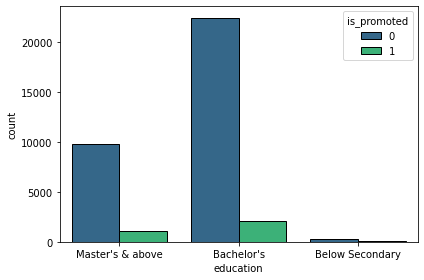

In [ ]:
#membuat grafik pendidikan berdasarkan promosi
print(sns.countplot(df['education'],hue=df['is_promoted'],palette='viridis',saturation=0.9,edgecolor="black"))
plt.tight_layout()
plt.show()

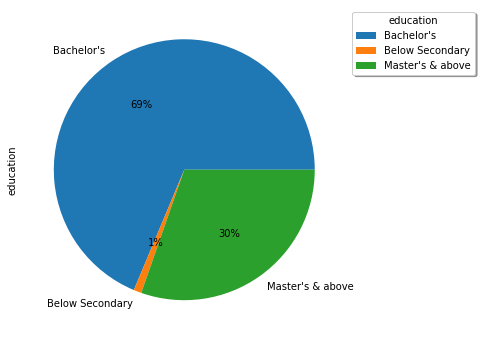

In [ ]:
# grafik jumlah karyawan berdasarkan pendidikan
plt.figure(figsize=(8,6))
dfgen = df.groupby(['education'])['education'].count().plot(kind='pie',autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='education')
plt.show()

In [ ]:
#mencari probabilitas yang akan dipromosikan dari pendidikan
chan_df=[]
for val in np.sort(df['education'].unique()):
    chan=dfedu_prom['education'][val][1]/(dfedu_prom['education'][val][1]+dfedu_prom['education'][val][0])
    chan_df.append({
        'education':val,
        'chance':chan
    })

chan_df=pd.DataFrame(chan_df)
chan_df.sort_values('chance',ascending=False,inplace=True)
chan_df

,education,chance
2,Master's & above,0.099083
1,Below Secondary,0.093023
0,Bachelor's,0.083061


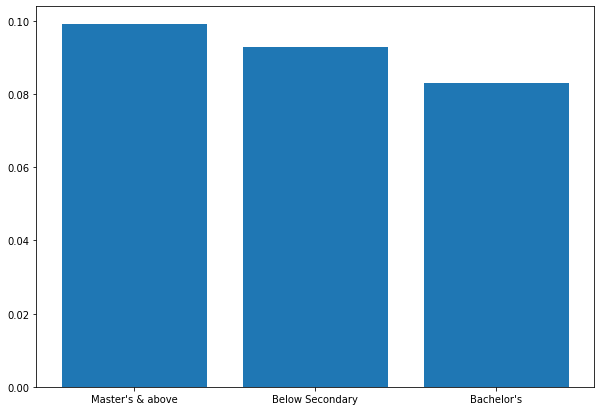

In [ ]:
#grafik probabilitas promosi berdasarkan pendidikan
fig = plt.figure(figsize =(10, 7))
plt.bar(chan_df['education'], chan_df['chance'])
plt.show()

Dari hasil di atas diketahui bahwa
- Karyawan di perusahaan lebih banyak lulusan Bachelor's.
- Promosi yang di peroleh oleh karyawan dengan tingkat pendidikan Bechelor's paling banyak.
- Peluang untuk karyawan dengan tingkat pendidikan Master's & above 9.9% , Below Secondary 9.3% dan Bechelor's 8.3%. Hal ini dikarenakan jumlah karyawan dengan tingkat pendidikan Master's & above dan Below Secondary lebih sedikit dari pada Bechelor's

## Gender

In [ ]:
#mengecek promosi berdasarkan jenis kelamin
dfgen_prom=pd.DataFrame(df.groupby(['gender','is_promoted'])['gender'].count())
dfgen_prom

gender
gender is_promoted        
f      0              9837
       1              1008
m      0             22614
       1              2124

AxesSubplot(0.125,0.125;0.775x0.755)


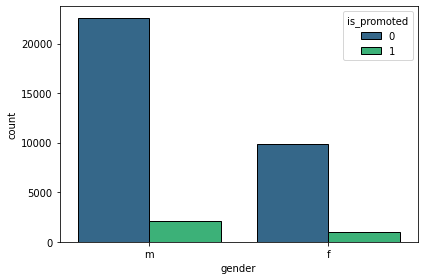

In [ ]:
#grafik promosi berdasarkn jenis kelamin
print(sns.countplot(df['gender'],hue=df['is_promoted'],palette='viridis',saturation=0.9,edgecolor="black"))
plt.tight_layout()
plt.show()

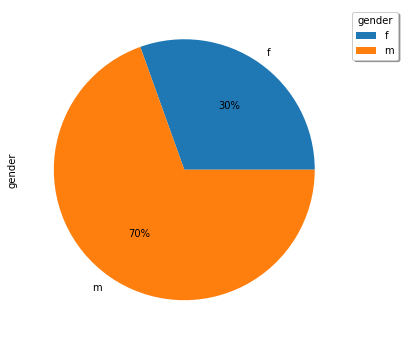

In [ ]:
#grafik jumlah karyawan berdasarkan jenis kelamin
plt.figure(figsize=(8,6))

dfgen = df.groupby(['gender'])['gender'].count().plot(kind='pie',autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='gender')
plt.show()

In [ ]:
#probabilitas terpromosi berdasarkan jenis kelamin
chan_df=[]
for val in np.sort(df['gender'].unique()):
    chan=dfgen_prom['gender'][val][1]/(dfgen_prom['gender'][val][1]+dfgen_prom['gender'][val][0])
    chan_df.append({
        'gender':val,
        'chance':chan
    })

chan_df=pd.DataFrame(chan_df)
chan_df.sort_values('chance',ascending=False,inplace=True)
chan_df

,gender,chance
0,f,0.092946
1,m,0.085860


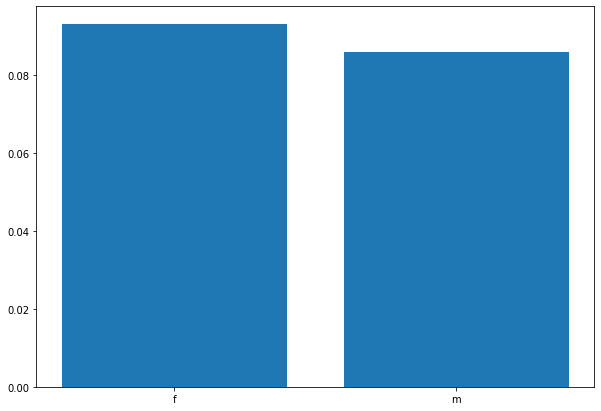

In [ ]:
#grafik probabilitas berdasarkan jenis kelamin
fig = plt.figure(figsize =(10, 7))
plt.bar(chan_df['gender'], chan_df['chance'])
plt.show()

Dari hasil di atas diketahui bahwa
- Karyawan di perusahaan lebih banyak berjenis kelamin Male.
- Promosi yang di peroleh oleh karyawan dengan jenis kelamin Male lebih banyak dibandingkan female.
- Peluang untuk karyawan dengan jenis kelamin Female 9.2% dan Male 8.5%. Hal ini disebabkan karena mayoritas karyawan dalam perusahaan berjenis kelamin Male sehingga persaingnya banyak.

## Departemen

Departemen dengan karyawan yang banyak di promosikan

In [ ]:
#melihat departemen dengan karyawan yang banyak di promosikan
dfdep_prom=pd.DataFrame(df.groupby(['department','is_promoted'])['department'].count())
dfdep_prom

department
department        is_promoted            
Analytics         0                  3047
                  1                   335
Finance           0                  1497
                  1                   126
HR                0                  1445
                  1                    97
Legal             0                   586
                  1                    29
Operations        0                  6966
                  1                   727
Procurement       0                  4395
                  1                   490
R&D               0                   620
                  1                    46
Sales & Marketing 0                  9644
                  1                   749
Technology        0                  4251
                  1                   533

AxesSubplot(0.125,0.125;0.775x0.755)


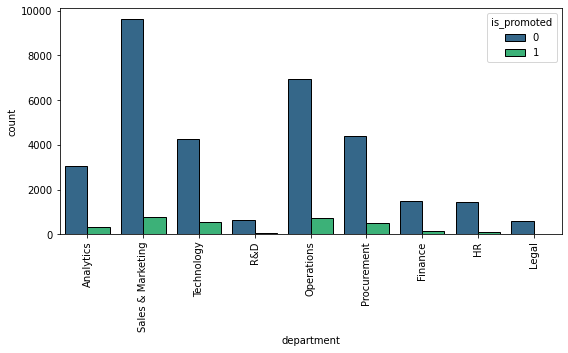

In [ ]:
#grafik departemen berdasarkan promosi
plt.figure(figsize=(8,5))
print(sns.countplot(df['department'],hue=df['is_promoted'],palette='viridis',saturation=0.9,edgecolor="black"))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

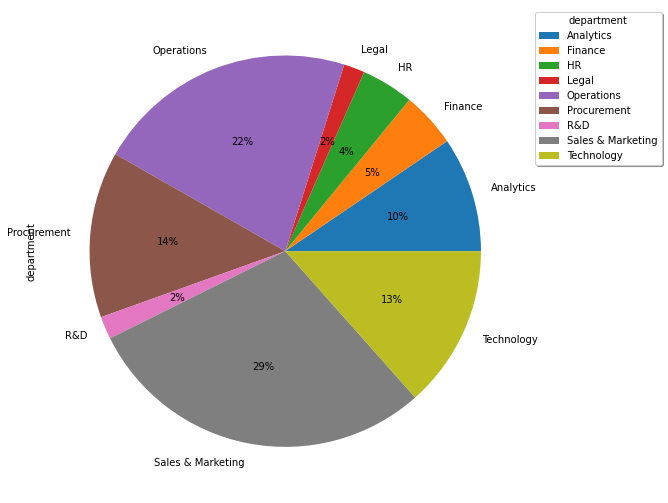

In [ ]:
#mengecek jumlah karyawan pada departemen
plt.figure(figsize=(10,9))

dfgen = df.groupby(['department'])['department'].count().plot(kind='pie',autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='department')
plt.show()

In [ ]:
#mencari probabilitas departemen dari segi promosi
chan_df=[]
for val in np.sort(df['department'].unique()):
    chan=dfdep_prom['department'][val][1]/(dfdep_prom['department'][val][1]+dfdep_prom['department'][val][0])
    chan_df.append({
        'department':val,
        'chance':chan
    })

chan_df=pd.DataFrame(chan_df)
chan_df.sort_values('chance',ascending=False,inplace=True)
chan_df

,department,chance
8,Technology,0.111413
5,Procurement,0.100307
0,Analytics,0.099054
4,Operations,0.094501
1,Finance,0.077634
7,Sales & Marketing,0.072068
6,R&D,0.069069
2,HR,0.062905
3,Legal,0.047154


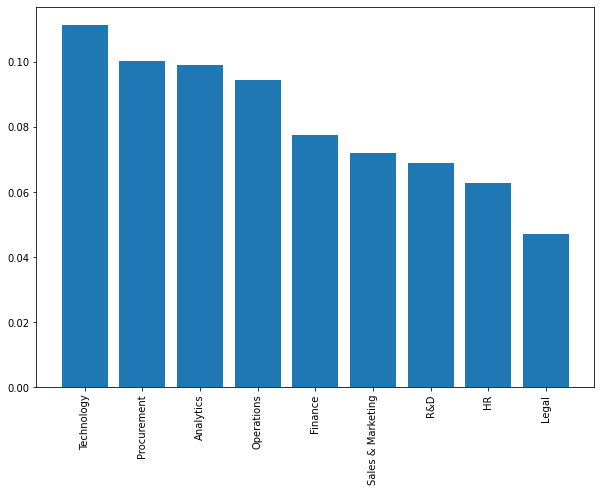

In [ ]:
#grafik departemen berdasarkan probabilitas promosi
fig = plt.figure(figsize =(10, 7))
plt.bar(chan_df['department'], chan_df['chance'])
plt.xticks(rotation=90)
plt.show()

Dari hasil di atas diketahui bahwa
- Divisi Sales & Marketing dan Operation memiliki karyawan yang paling banyak.
- Divisi yang memperoleh karyawan dengan promosi paling banyak Sales & Marketing dan Operations.
- Peluang untuk karyawan yang berada pada divisi teknologi memiliki peluang yang besar untuk di promosikan. Hal ini dipengaruhi persaingan karyawan yang kecil pada divisi tersebut.

Departemen dengan Penghargaan terbanyak

In [ ]:
#melihat departemen berdasarkan awards
dfdep_prom2=pd.DataFrame(df.groupby(['department','awards_won?'])['department'].count())
dfdep_prom2

department
department        awards_won?            
Analytics         0                  3306
                  1                    76
Finance           0                  1579
                  1                    44
HR                0                  1512
                  1                    30
Legal             0                   598
                  1                    17
Operations        0                  7515
                  1                   178
Procurement       0                  4753
                  1                   132
R&D               0                   650
                  1                    16
Sales & Marketing 0                 10178
                  1                   215
Technology        0                  4653
                  1                   131

AxesSubplot(0.125,0.125;0.775x0.755)


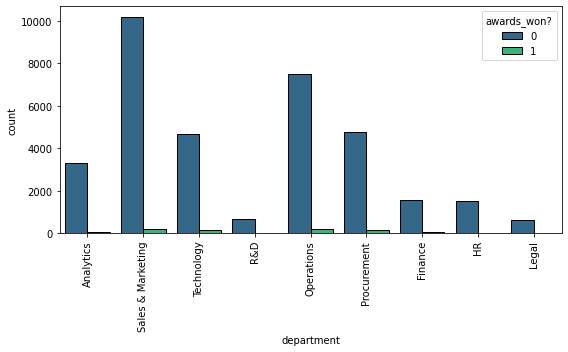

In [ ]:
#grafik departeen berdasarkan awards
plt.figure(figsize=(8,5))
print(sns.countplot(df['department'],hue=df['awards_won?'],palette='viridis',saturation=0.9,edgecolor="black"))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#mencari probabilitas departemen berdasakan awards
chan_df=[]
for val in np.sort(df['department'].unique()):
    chan=dfdep_prom2['department'][val][1]/(dfdep_prom2['department'][val][1]+dfdep_prom2['department'][val][0])
    chan_df.append({
        'department':val,
        'chance':chan
    })

chan_df=pd.DataFrame(chan_df)
chan_df.sort_values('chance',ascending=False,inplace=True)

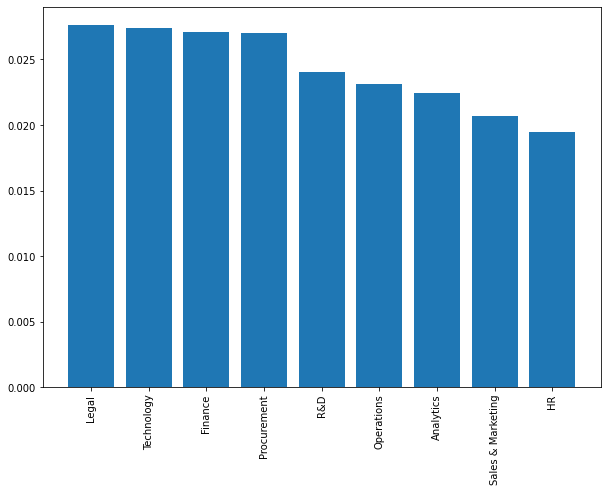

In [ ]:
#menampilan probabilitas departemen berdasarkan awards
fig = plt.figure(figsize =(10, 7))
plt.bar(chan_df['department'], chan_df['chance'])
plt.xticks(rotation=90)
plt.show()

Dari hasil di atas diketahui bahwa
- Divisi yang memperoleh Penghargaan terbanyak Sales & Marketing dan Operations.
- Peluang Divisi Legal, Tecnology, Finance dan Procurement mempunyai peluang yang cukup besar untuk memperoleh penghargaan

## Region

In [ ]:
#melihat region yang mendapatkan promosi
dfreg_prom=pd.DataFrame(df.groupby(['region','is_promoted'])['region'].count())
dfreg_prom

region
region    is_promoted        
region_1  0               365
          1                38
region_10 0               409
          1                31
region_11 0               816
...                       ...
region_7  1               355
region_8  0               374
          1                41
region_9  0               219
          1                 6

[68 rows x 1 columns]

AxesSubplot(0.125,0.125;0.775x0.755)


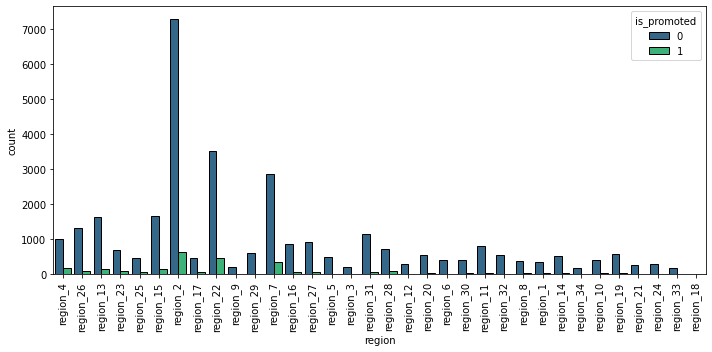

In [ ]:
#grafik region berdasarkan promosi
plt.figure(figsize=(10,5))
print(sns.countplot(df['region'],hue=df['is_promoted'],palette='viridis',saturation=0.9,edgecolor="black"))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

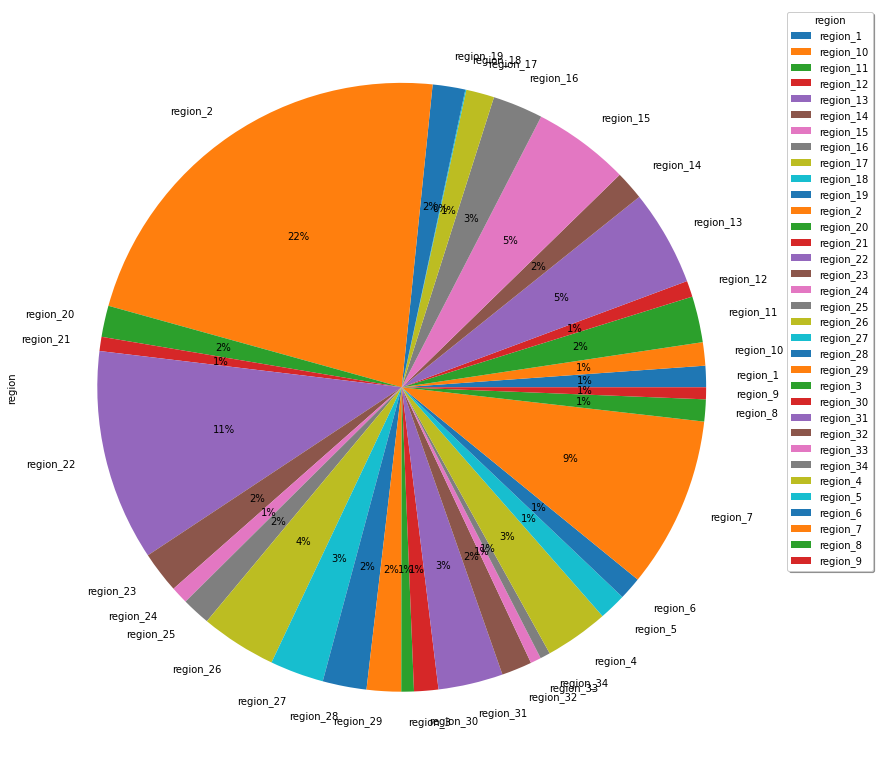

In [ ]:
#mengecek persentase region
plt.figure(figsize=(15,14))

dfgen = df.groupby(['region'])['region'].count().plot(kind='pie',autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='region')
plt.show()

In [ ]:
#mencari probabilitas region yang mendapatkan promosi
chan_df=[]
for val in np.sort(df['region'].unique()):
    chan=dfreg_prom['region'][val][1]/(dfreg_prom['region'][val][1]+dfreg_prom['region'][val][0])
    chan_df.append({
        'region':val,
        'chance':chan
    })

chan_df=pd.DataFrame(chan_df)
chan_df.sort_values('chance',ascending=False,inplace=True)

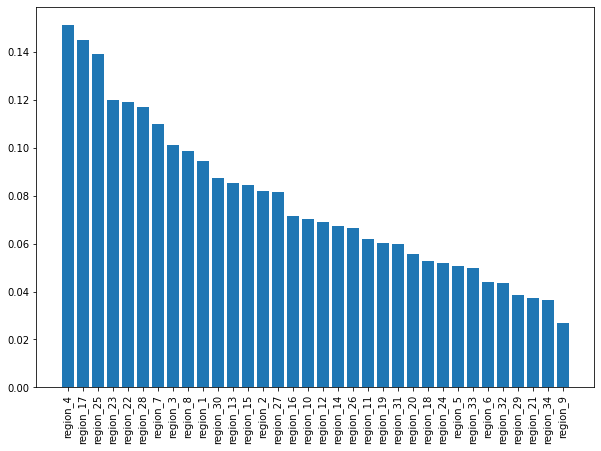

In [ ]:
#grafik probabilitas region
fig = plt.figure(figsize =(10, 7))
plt.bar(chan_df['region'], chan_df['chance'])
plt.xticks(rotation=90)
plt.show()

Dari hasil di atas diketahui bahwa
- Region 2, Region 22 dan Region 7 mempunyai karyawan yang banyak dibandingkan dengan region lainnya.
- Peluang untuk karyawan yang berada pada region 4, region 17 dan region 25 memiliki peluang yang besar untuk karyawannya promosikan. Hal ini dipengaruhi persaingan karyawan yang kecil pada region tersebut.

## Recruitmen chanel

In [ ]:
#melihat promisi berdasarkan recruitment chanel
dfrec_prom=pd.DataFrame(df.groupby(['recruitment_channel','is_promoted'])['recruitment_channel'].count())
dfrec_prom

recruitment_channel
recruitment_channel is_promoted                     
other               0                          18063
                    1                           1711
referred            0                            623
                    1                             89
sourcing            0                          13765
                    1                           1332

AxesSubplot(0.125,0.125;0.775x0.755)


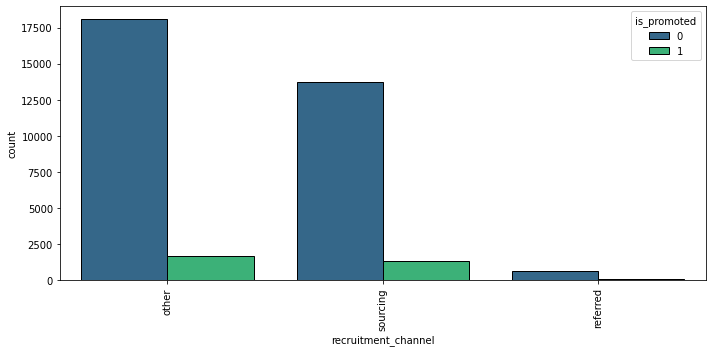

In [ ]:
#grafik promosi berdasarkan recruitmen chanel
plt.figure(figsize=(10,5))
print(sns.countplot(df['recruitment_channel'],hue=df['is_promoted'],palette='viridis',saturation=0.9,edgecolor="black"))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

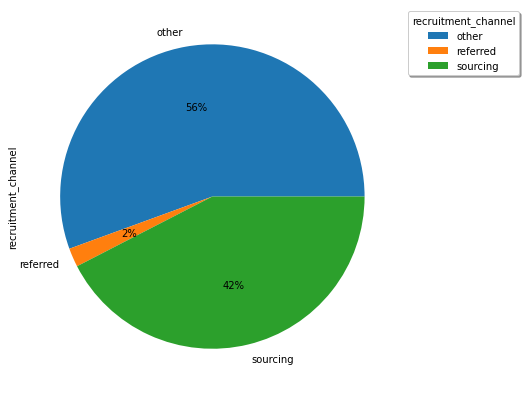

In [ ]:
#jumlah karyawan berdasarkan recruitmen chanel
plt.figure(figsize=(7,7))

dfgen = df.groupby(['recruitment_channel'])['recruitment_channel'].count().plot(kind='pie',autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='recruitment_channel')
plt.show()

Berdasarkan hasil di atas dapat dilihat bahwa
- Karyawan yang berkerja pada Bukapedia lebih banyak melamar dengan jalur other

## **Kesimpulan EDA** 

Berdasarkan hasil di atas dapat disimpulkan bahwa 
- Dilihat dari Education karyawan dengan Education Master's & above dan Below Secondary mempunyai peluang lebih besar di promosikan hal ini dipengaruhi oleh jumla karyawan dengan Education tersebut lebih sedikit dibandingkan dengan Bechelor's.
- Dilihat dari gander karyawan female lebih sedikit dibandingkan dengan male sehingga peluangnya untuk mendapat promosi lebih banyak.
- Department yang mempunyai peluang untuk mendapatkan karyawan promisi yang tinggi yaitu divisi teknologi. Jika dilihat untuk yang memperoleh penghargaan Department Legal, Tecnology, Finance dan Procurement mempunyai peluang yang cukup besar untuk memperoleh penghargaan
- Peluang untuk karyawan yang berada pada region 4, region 17 dan region 25 memiliki peluang yang besar untuk karyawannya promosikan.

## Correlation

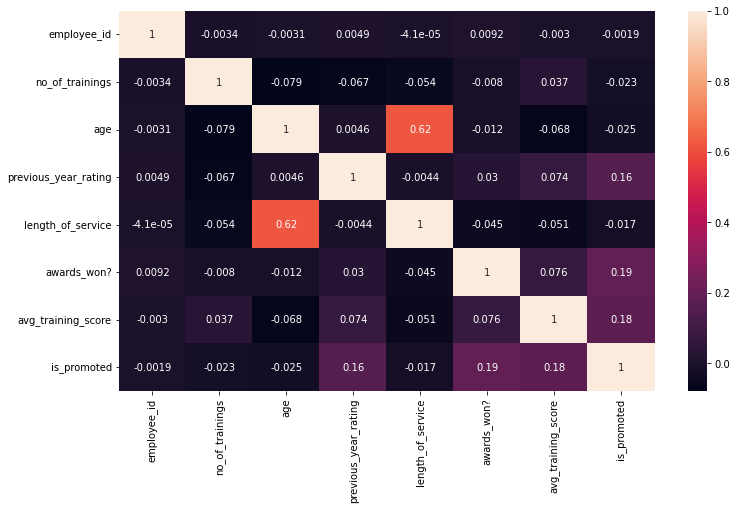

In [ ]:
#mengecek korelasi antar variabel
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

Dari Tabel di atas dapat diketahui bahwa
- length_of_service  dan age mempunyai korelasi yang kuat. Hal itu bisa saja terjadi karena usia semakin bertambah pengalaman kerja atau cara pandang semakin bagus.
- is_promoted mempunyai korelasi yang cukup lemah dengan previous_year_rating, awards_won, avg_training_score


# Data Processing

In [ ]:
#melakukan prop pada variabel yang tidak di gunakan
df.drop(columns=['no_of_trainings','age','gender','region','employee_id','length_of_service','recruitment_channel'],axis=1,inplace=True)

In [ ]:
#menampilkan data hasil drop
df.head()

,department,education,previous_year_rating,awards_won?,avg_training_score,is_promoted
3,Analytics,Master's & above,4.0,0,84,0
4,Sales & Marketing,Bachelor's,3.0,0,49,0
5,Sales & Marketing,Master's & above,3.0,0,53,0
6,Technology,Bachelor's,1.0,0,77,0
7,Technology,Bachelor's,2.0,0,84,0


In [ ]:
#melakukan labeling pada data bukan numerik
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [ ]:
df.head()

,department,education,previous_year_rating,awards_won?,avg_training_score,is_promoted
3,0,2,4.0,0,84,0
4,7,0,3.0,0,49,0
5,7,2,3.0,0,53,0
6,8,0,1.0,0,77,0
7,8,0,2.0,0,84,0


In [ ]:
#membuat variabel X dan y
X=df.drop('is_promoted',axis=1)
y=df['is_promoted']

In [ ]:
#melakukan pembagian data
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20)

In [ ]:
#melihat data trening
Xtrain.head()

,department,education,previous_year_rating,awards_won?,avg_training_score
38794,4,0,1.0,0,61
21908,4,2,5.0,0,61
19660,1,2,3.0,0,59
11581,5,0,4.0,0,70
7303,7,0,3.0,0,45


In [ ]:
#melihat data testing
Xtest.head()

,department,education,previous_year_rating,awards_won?,avg_training_score
25573,0,0,4.0,0,85
20840,0,2,4.0,0,80
29297,4,0,5.0,0,53
13759,4,2,5.0,0,56
33781,5,0,5.0,0,73


In [ ]:
#melihat perbandingan data yang dirpomiskan dan tidak dipromosikan
df['is_promoted'].value_counts()

0    32451
1     3132
Name: is_promoted, dtype: int64

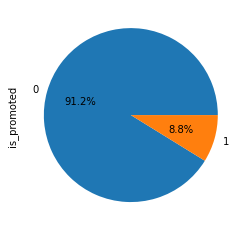

In [ ]:
#grafik perbandingan data promosi dan tidak dipromosi
df['is_promoted'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Modeling

In [ ]:
# import library yang digunakan dalam mengecek akurasi
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

## Random Forest Classifier

In [ ]:
#import labrary model
from sklearn.ensemble import RandomForestClassifier
#membuat variabel model
clf= RandomForestClassifier()
clf.fit(Xtrain,ytrain)

RandomForestClassifier()

In [ ]:
#prediksi model
ypred=clf.predict(Xtest)
#menampilkan akurasi pada model
print('Akurasi model :',metrics.accuracy_score(ytest,ypred))
print('classification report:\n',classification_report(ytest,ypred))
print('accuracy :',round(accuracy_score(ytest,ypred),2))
print('precision :',round(precision_score(ytest,ypred),2))
print('recall :',round(recall_score(ytest,ypred),2))
print('f1 :',round(f1_score(ytest,ypred),2))
print()

Akurasi model : 0.9407053533792328
classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      6495
           1       0.90      0.36      0.51       622

    accuracy                           0.94      7117
   macro avg       0.92      0.68      0.74      7117
weighted avg       0.94      0.94      0.93      7117

accuracy : 0.94
precision : 0.9
recall : 0.36
f1 : 0.51



## Logistik Regresion

In [ ]:
#import labrary model
from sklearn.linear_model import LogisticRegression
#membuat variabel model
lr= LogisticRegression()
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [ ]:
#prediksi model
ypred=lr.predict(Xtest)
#menampilkan akurasi pada model
print('Akurasi model :',metrics.accuracy_score(ytest,ypred))
print('classification report: \n',classification_report(ytest,ypred))
print('accuracy :',round(accuracy_score(ytest,ypred),2))
print('precision :',round(precision_score(ytest,ypred),2))
print('recall :',round(recall_score(ytest,ypred),2))
print('f1 :',round(f1_score(ytest,ypred),2))
print()

Akurasi model : 0.9169593930026697
classification report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6495
           1       0.77      0.07      0.13       622

    accuracy                           0.92      7117
   macro avg       0.85      0.53      0.54      7117
weighted avg       0.91      0.92      0.88      7117

accuracy : 0.92
precision : 0.77
recall : 0.07
f1 : 0.13



## KNeighborsClassifier

In [ ]:
#import labrary model
from sklearn.neighbors import KNeighborsClassifier
#membuat variabel model
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
#prediksi model
ypred=knn.predict(Xtest)
#menampilkan akurasi pada model
print('Akurasi model :',metrics.accuracy_score(ytest,ypred))
print('classification report:\n',classification_report(ytest,ypred))
print('accuracy :',round(accuracy_score(ytest,ypred),2))
print('precision :',round(precision_score(ytest,ypred),2))
print('recall :',round(recall_score(ytest,ypred),2))
print('f1 :',round(f1_score(ytest,ypred),2))
print()

Akurasi model : 0.9380356891948854
classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      6495
           1       0.89      0.33      0.49       622

    accuracy                           0.94      7117
   macro avg       0.91      0.67      0.73      7117
weighted avg       0.94      0.94      0.92      7117

accuracy : 0.94
precision : 0.89
recall : 0.33
f1 : 0.49



## Naive Bayes

In [ ]:
#import labrary model
from sklearn.naive_bayes import GaussianNB
#membuat variabel model
nb = GaussianNB()
nb.fit(Xtrain, ytrain)

GaussianNB()

In [ ]:
#prediksi model
ypred=nb.predict(Xtest)
#menampilkan akurasi pada model
print('Akurasi model :',metrics.accuracy_score(ytest,ypred))
print('classification report:\n',classification_report(ytest,ypred))
print('accuracy :',round(accuracy_score(ytest,ypred),2))
print('precision :',round(precision_score(ytest,ypred),2))
print('recall :',round(recall_score(ytest,ypred),2))
print('f1 :',round(f1_score(ytest,ypred),2))
print()

Akurasi model : 0.9130251510467894
classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      6495
           1       0.51      0.13      0.21       622

    accuracy                           0.91      7117
   macro avg       0.72      0.56      0.58      7117
weighted avg       0.89      0.91      0.89      7117

accuracy : 0.91
precision : 0.51
recall : 0.13
f1 : 0.21



Dari Hasil Modeling ternyata menghasilnya akurasi yang baik namun dari data yang ditraining lebih banyak membaca data 0, hal ini tidak bagus dalam model sehingga perlu dilakukan handling imbalence data agar data yang digunakan seimbang atau sesuai dengan proporsinya.

# Imbalence Data

In [ ]:
#membuat wadah untuk menampung variabel model
model = [clf,lr,knn,nb]

In [ ]:
#Karena dalam model tingkat akurasinya sangat tinggi dan pembagian data tidak seimbang dilakukan imbalence data

#import labrary untuk imbalencing data
from imblearn.combine import SMOTEENN
#Melakukan imbalence data
smt = SMOTEENN(random_state = 42)
Xres, yres = smt.fit_resample(X, y)

print(yres.value_counts())

Xtrain_res,Xtest_res,ytrain_res,ytest_res=train_test_split(Xres,yres,test_size=0.20, random_state=42)

0    27449
1    15674
Name: is_promoted, dtype: int64


In [ ]:
#melakukan fiting, pprediksi dan mengecek akurasi pada masing-masing model
for models in model:
    models.fit(Xtrain_res,ytrain_res)

    ypred_res=models.predict(Xtest_res)

    print('Model :',models)
    print('Akurasi model :',metrics.accuracy_score(ytest_res,ypred_res))
    print('='*100)
    print('classification report:\n',classification_report(ytest_res,ypred_res))
    print('accuracy :',round(accuracy_score(ytest_res,ypred_res),2))
    print('precision :',round(precision_score(ytest_res,ypred_res),2))
    print('recall :',round(recall_score(ytest_res,ypred_res),2))
    print('f1 :',round(f1_score(ytest_res,ypred_res),2))
    print()

Model : RandomForestClassifier()
Akurasi model : 0.9547826086956521
classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      5483
           1       0.99      0.89      0.93      3142

    accuracy                           0.95      8625
   macro avg       0.96      0.94      0.95      8625
weighted avg       0.96      0.95      0.95      8625

accuracy : 0.95
precision : 0.99
recall : 0.89
f1 : 0.93

Model : LogisticRegression()
Akurasi model : 0.7524637681159421
classification report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      5483
           1       0.71      0.55      0.62      3142

    accuracy                           0.75      8625
   macro avg       0.74      0.71      0.72      8625
weighted avg       0.75      0.75      0.74      8625

accuracy : 0.75
precision : 0.71
recall : 0.55
f1 : 0.62

Model : KNeighborsClassifier()
Akurasi model : 0.9

# Predictid

In [ ]:
#melakukan uji coba terhadap model yang akan dilakukan prediksi
departemen = int(input('Apa departemen anda? '))
education = int(input('Apa Pendidikan anda? '))
prev_year_reting = int(input('berapa reting anda? '))
award_won = int(input('Apa anda mendapat award? '))
avg_training_score = int(input('berapa nilai trening anda? '))


hasil_prediksi  = clf.predict([[departemen,education,prev_year_reting,award_won,avg_training_score]])
hasil_prediksi

if hasil_prediksi == 1:
  print('Promosi')
elif hasil_prediksi == 0:
  print('Tidak Dipromosikan')

Apa departemen anda? 1
Apa Pendidikan anda? 1
berapa reting anda? 3
Apa anda mendapat award? 1
berapa nilai trening anda? 50
Tidak Dipromosikan


## Import Data

In [ ]:
#import data
df1 = pd.read_csv('predict2022.csv')
df1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85
4,54990,Operations,region_28,Bachelor's,m,sourcing,1,24,NaN,1,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...
14702,51178,Technology,region_16,Bachelor's,m,sourcing,1,30,4.0,8,0,77
14703,16756,Procurement,region_13,Master's & above,f,other,1,37,5.0,8,0,68
14704,745,Technology,region_22,Bachelor's,m,referred,1,31,4.0,4,0,78
14705,17637,R&D,region_10,Master's & above,m,other,1,34,5.0,6,0,87


In [ ]:
#mengecek info data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14707 entries, 0 to 14706
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           14707 non-null  int64  
 1   department            14707 non-null  object 
 2   region                14707 non-null  object 
 3   education             14066 non-null  object 
 4   gender                14707 non-null  object 
 5   recruitment_channel   14707 non-null  object 
 6   no_of_trainings       14707 non-null  int64  
 7   age                   14707 non-null  int64  
 8   previous_year_rating  13607 non-null  float64
 9   length_of_service     14707 non-null  int64  
 10  awards_won?           14707 non-null  int64  
 11  avg_training_score    14707 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.3+ MB


In [ ]:
#mengecek jumlah data null
df1.isna().sum()

employee_id                0
department                 0
region                     0
education                641
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1100
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
#melakukan drop pada data null
df1.dropna(inplace=True)

In [ ]:
df1.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
#menampilkan data yang digunakan
df1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85
5,71605,Procurement,region_1,Master's & above,f,other,1,32,3.0,6,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...
14701,68066,Operations,region_31,Bachelor's,m,other,1,41,5.0,4,0,61
14702,51178,Technology,region_16,Bachelor's,m,sourcing,1,30,4.0,8,0,77
14703,16756,Procurement,region_13,Master's & above,f,other,1,37,5.0,8,0,68
14704,745,Technology,region_22,Bachelor's,m,referred,1,31,4.0,4,0,78


In [ ]:
#mengecek data duplikat
df1.duplicated().sum()

0

## Procesing data Predictid

In [ ]:
#melakukan drop data pada data yang tidak digunakan
df1.drop(columns=['no_of_trainings','age','gender','region','employee_id','length_of_service','recruitment_channel'],axis=1,inplace=True)

In [ ]:
df1.head()

,department,education,previous_year_rating,awards_won?,avg_training_score
0,Procurement,Bachelor's,3.0,0,69
1,Sales & Marketing,Bachelor's,5.0,0,51
2,Operations,Bachelor's,3.0,0,63
3,Analytics,Bachelor's,1.0,0,85
5,Procurement,Master's & above,3.0,0,66


In [ ]:
#melakukan labeling data
l=LabelEncoder()
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i]=l.fit_transform(df1[i])

In [ ]:
df1.head()

,department,education,previous_year_rating,awards_won?,avg_training_score
0,5,0,3.0,0,69
1,7,0,5.0,0,51
2,4,0,3.0,0,63
3,0,0,1.0,0,85
5,5,2,3.0,0,66


## Predict

Dipromosikan

In [ ]:
#melakukan prediksi
clf_pred = clf.predict(df1)

In [ ]:
#membuat variabel promosi pada data prediksi
df1['promosi'] = clf_pred

In [ ]:
#melihat jumlah karyawan yang dipromosikan
df1['promosi'].value_counts()

0    11383
1     1693
Name: promosi, dtype: int64

Berdasarkan model random foresclasifer banyak karyawan yang memperoleh promosi adalah 1693 dan tidak di promosikan 11383. 


In [ ]:
df2 = pd.read_csv('predict2022.csv')
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85
4,54990,Operations,region_28,Bachelor's,m,sourcing,1,24,NaN,1,0,55


In [ ]:
df2.dropna(inplace=True)

In [ ]:
#menambahkan variabel promosi kepada data
df2['promosi']=df1['promosi']
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,promosi
0,3387,Procurement,region_15,Bachelor's,f,other,1,36,3.0,3,0,69,0
1,67479,Sales & Marketing,region_7,Bachelor's,m,sourcing,2,31,5.0,4,0,51,0
2,8070,Operations,region_13,Bachelor's,f,sourcing,1,40,3.0,13,0,63,0
3,46497,Analytics,region_26,Bachelor's,m,other,1,31,1.0,4,0,85,0
5,71605,Procurement,region_1,Master's & above,f,other,1,32,3.0,6,0,66,0


In [ ]:
df2.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
promosi                 0
dtype: int64

In [ ]:
df2.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,promosi
count,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000,13076.000000
mean,39168.413353,1.246406,35.582747,3.344371,6.281508,0.021949,63.461303,0.129474
std,22584.261604,0.597514,7.512893,1.250814,4.166449,0.146521,13.262952,0.335736
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19543.500000,1.000000,30.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39059.500000,1.000000,34.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58707.750000,1.000000,39.000000,4.000000,8.000000,0.000000,75.000000,0.000000
max,78297.000000,10.000000,60.000000,5.000000,34.000000,1.000000,99.000000,1.000000


## TOP 3 Karyawan

In [ ]:
#enampilakn karyawan yang mendapat promosi dengan reting 5
df2_prom = df2[(df2['promosi'] == 1) & (df2['previous_year_rating'] == 5)]
df2_prom.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,promosi
7,5112,Operations,region_2,Bachelor's,f,other,1,33,5.0,8,0,76,1
16,25769,Analytics,region_32,Bachelor's,m,other,1,35,5.0,8,0,86,1
18,56183,Analytics,region_4,Master's & above,m,sourcing,3,37,5.0,9,1,89,1


In [ ]:
#mencari 3 karyawan yang dipromosikan dengan nilai dan reting terbaik
top_karyawan = df2_prom.groupby(by = ['employee_id']).agg(avg_train=('avg_training_score','sum'),previous_rating=('previous_year_rating','mean'))
top_karyawan.sort_values(by='avg_train',ascending=False).head(3)

,avg_train,previous_rating
employee_id,,
17137,99,5.0
7260,99,5.0
78115,98,5.0


Dari hasil di atas di peroleh 3 Karyawan terbaik yang masuk kedalam nominasi.

## Departemen Berprestasi

In [ ]:
df2_dep = df2[df2['promosi']==1]

In [ ]:
#mengelompokkan departemen berdasarkan rata-rata nilai karu=yawannya, reting dan award yang diperoleh
dep_good = df2_dep.groupby(by = ['department']).agg(mean_avg_train=('avg_training_score','mean'),mean_prev_rating =('previous_year_rating','mean'),award = ('awards_won?','mean'))
dep_good

,mean_avg_train,mean_prev_rating,award
department,,,
Analytics,86.589862,4.165899,0.096774
Finance,66.500000,3.878378,0.054054
HR,52.285714,3.952381,0.047619
Legal,63.878788,4.333333,0.060606
Operations,66.006557,4.203279,0.081967
Procurement,74.110266,4.520913,0.060837
R&D,84.184211,4.526316,0.078947
Sales & Marketing,57.229645,4.066806,0.081420
Technology,82.491736,4.053719,0.111570


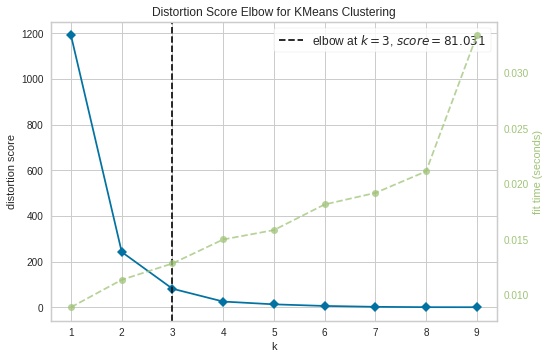

In [ ]:
#import labrary untuk melakukan cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k = (1, 10))
visualizer.fit(dep_good)
visualizer.poof()

In [ ]:
#melakukan modeling KMeans dengan 3 cluster
kmeans_mod = KMeans(n_clusters=3)
kmeans_mod.fit(dep_good) 

KMeans(n_clusters=3)

In [ ]:
dep_good['cluster'] = kmeans_mod.labels_
good = dep_good.drop(['cluster'],axis =1)

In [ ]:
#mengecek akurasi model
from sklearn import metrics

print('Akurasi Model :', metrics.silhouette_score(good,kmeans_mod.labels_))

Akurasi Model : 0.6320330208534686


In [ ]:
#mengecek culster yang di buat
dep_good.groupby('cluster').mean()

,mean_avg_train,mean_prev_rating,award
cluster,,,
0,67.623903,4.233976,0.064366
1,84.421936,4.248644,0.095764
2,54.757680,4.009593,0.064519


In [ ]:
#menampilkan cluster 1
dep_good[dep_good['cluster']==1]

,mean_avg_train,mean_prev_rating,award,cluster
department,,,,
Analytics,86.589862,4.165899,0.096774,1
R&D,84.184211,4.526316,0.078947,1
Technology,82.491736,4.053719,0.111570,1


Dari hasil tersebut di peroleh Divisi yang paling berprestasi yaitu terdapat pada cluster 1 yang diisi oleh Divisi Analytics, R&D dan Technology

# Kesimpulan 

Dari hasil Modeling diperoleh model Random Forest Classifer digunakan untuk melakukan predictid diperoleh 
- Banyak karyawan yang di promosikan pada tahun 2022 yaitu 1.693 Karyawan
- Karyawan yang paling berprestasi diperoleh dengan employ_id
  - 7260
  - 17137
  - 78115
- Departemen yang berprestasi dan bisa diberikan reward yaitu
  - Analytics
  - R&D
  - Technology